# Introduction to OSM Network Data

This Notebook is meant to be a brief guide on working with [Open Street Map (OSM)](https://www.openstreetmap.org/) network data, primarily using the [OSMnx](https://osmnx.readthedocs.io/) Python package. It walks through obtaining network data from OSMnx, exploring the data, and a simple use case of calculating free-flow travel time on the network.

Notebook author: **Alexander Michels**
<br>Notebook created: January 30, 2022. Last updated: **February 10, 2022**

## Notebook Outline:
1. [Introduction](#intro)
1. [Getting the Data](#getting-data)
1. [Exploring the Data](#exploring-data)
1. [Simple Use Case](#using-data)
1. [What's Next](#whats-next)
1. [References](#refs)

In [1]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import osmnx as ox

plt.rcParams["figure.figsize"] = (20, 10)

<hr id='intro'>

## Introduction

## What is OpenStreetMap?

OpenStreet map is a [Volunteer Geographic Information](https://en.wikipedia.org/wiki/Volunteered_geographic_information) platform which collects and houses geographic data from around the world.

Take a moment to explore the site! Find your current location on the map and see what else is in your vicinity! https://www.openstreetmap.org/

## What is OSMnx?

The OSMnx README puts it best:

>OSMnx is a Python package that lets you download geospatial data from OpenStreetMap and model, project, visualize, and analyze real-world street networks and any other geospatial geometries. You can download and model walkable, drivable, or bikeable urban networks with a single line of Python code then easily analyze and visualize them. You can just as easily download and work with other infrastructure types, amenities/points of interest, building footprints, elevation data, street bearings/orientations, and speed/travel time.

>If you use OSMnx in your work, please cite the journal article.

>Citation info: Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

To learn more about OSMnx, view the resources below:

* [Dr. Boeing's paper on OSMnx](doi.org/10.1016/j.compenvurbsys.2017.05.004)

<hr id="getting-data"/>

# Getting the Data

There are a few ways to obtain OpenStreetMap data using the OSMNX.

Examples:

* Getting data from an address -> `graph_from_address`
* Getting data from a bounding box -> `graph_from_bbox`
* Getting data from a geocodable place -> `graph_from_place`
* Getting data around some point -> `graph_from_point`
* Getting data for some polygon -> `graph_from_polygon`

We will look at two examples below: graph from place and graph from address.

### graph_from_place

[Doc link](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_place)

Let's grab the network for UIUC, but specifically the driving network. You can check out the doc link above to see all of the options and default values. 

For our query, we are putting in the place we want to pull ("University of Illinois at Urbana-Champaign").

In [2]:
# osmnx graph_from_place
# https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_place
uiuc_graph = ox.graph_from_place("University of Illinois at Urbana-Champaign", network_type="drive")

Let's plot the graph to see what it looks like. We can plot the graph in a static image like so using `plot_graph`:

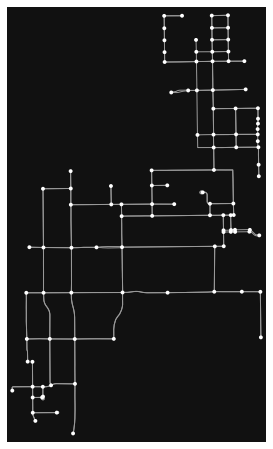

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
ox.plot_graph(uiuc_graph)

It's difficult to tell what we are looking at from this image, so we can plot the graph on an interactive folium map using `plot_graph_folium`. 

Note that this works well for small graphs, but large ones (many nodes/edges) will result in errors and crashes, so be careful!

In [4]:
ox.plot_graph_folium(uiuc_graph)

**Your turn!**

Think of a place you want to get a graph from! Maybe your college or hometown! 

You may want to use the [OpenStreetMap site](https://www.openstreetmap.org/) to make sure that the place you enter will be found. For example, while we were able to find UIUC by using the full name, just querying "UIUC" returns a result of a building in China.

Grab your graph from place and plot it!

### graph_from_address

[Doc link](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_address)

Let's grab the network around the Natural History Building where the Geography department is at UIUC. We will use the address and by default, osmnx grabs the network within a bounding box that is kilometer around it, but that can be changed with the `dist` parameter. Note that to get the driving network, we need to set `network_type` to "drive".

In [5]:
# osmnx graph_from_address
# https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_address
nhb_graph = ox.graph_from_address("1301 W Green St, Urbana, IL 61801", network_type="drive")

Let's plot the graph to see what it looks like. We can plot the graph in a static image like so using `plot_graph`:

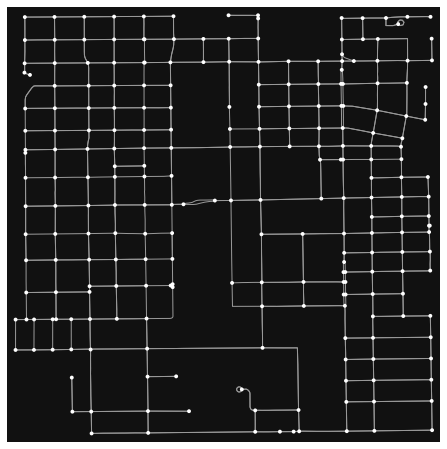

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
ox.plot_graph(nhb_graph)

But we can also plot the graph on an interactive map using `folium`, specifically the `plot_graph_folium` function:

In [7]:
ox.plot_graph_folium(nhb_graph)

**Your turn!**

Think of an address you want to get a graph from! Maybe your address or where you grew up!

Grab your graph and plot it!

### Saving and Loading OSMnx Networks

Getting large graphs from OSM can take a while, so many times it is useful to save the data and load it from you computer. The [io module](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.io) has lots of options, but we will use graphml.

Saving a network to graphml is relatively simple. Let's save it to "nhb_graph.graphml".

In [8]:
ox.save_graphml(nhb_graph, filepath="nhb_graph.graphml")

Now if we want to use the graph again, we can grab it from the file using `load_graphml`:

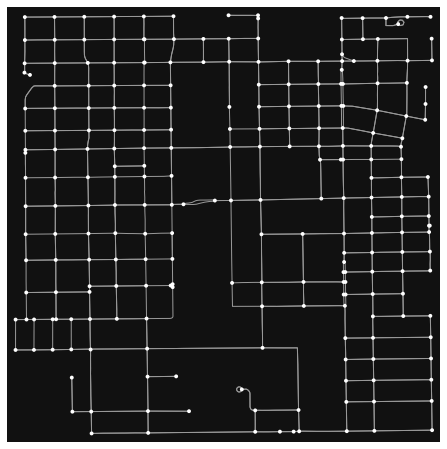

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
nhb_graph = ox.load_graphml("nhb_graph.graphml")
ox.plot_graph(nhb_graph)

### Other Options for Grabbing Data

We won't go over the other options for grabbing network data, but offer some examples where they may be useful.

* `graph_from_bbox` - you are conducting a study in a given bounding box. Many times Twitter data comes at the granularity of bounding boxes.
* `graph_from_point` - you want to calculate network distances around a single point. You may want to calculate the driving-time distance to grocery stores around your address.
* `graph_from_polygon` - many geography studies depend on some geographic unit: county, state, etc. and this allows you pull the entire network for that unit. This is highly recommended over `graph_from_place` when you have a polygon to avoid confusion (i.e. Champaign County vs Champaign the city).

<hr id="exploring-data"/>

# Exploring the Data

Now that you've mastered getting the data, what can we do with it? First, let's see how to check out the node and edge attributes by convering it to a Geodataframe:

### OSMNX to Geopandas

If you're familiar with the `geopandas` package, we can convert the graph to a GeoDataFrame to examine our data as well using the `graph_to_gdfs` function:

In [10]:
# convert to geodataframe
node_gdf, edge_gdf = ox.graph_to_gdfs(nhb_graph)

Now we can look at the data seperately:

In [11]:
# node data in a Geodataframe
node_gdf.head()

,y,x,street_count,highway,geometry
osmid,,,,,
37967516,40.118384,-88.225718,3,NaN,POINT (-88.22572 40.11838)
37968196,40.109403,-88.214484,1,NaN,POINT (-88.21448 40.10940)
37972324,40.109129,-88.214520,4,NaN,POINT (-88.21452 40.10913)
37972330,40.109113,-88.216031,4,NaN,POINT (-88.21603 40.10911)
37972337,40.109090,-88.217713,4,NaN,POINT (-88.21771 40.10909)


And we can plot just the nodes using Geopandas

<AxesSubplot:>

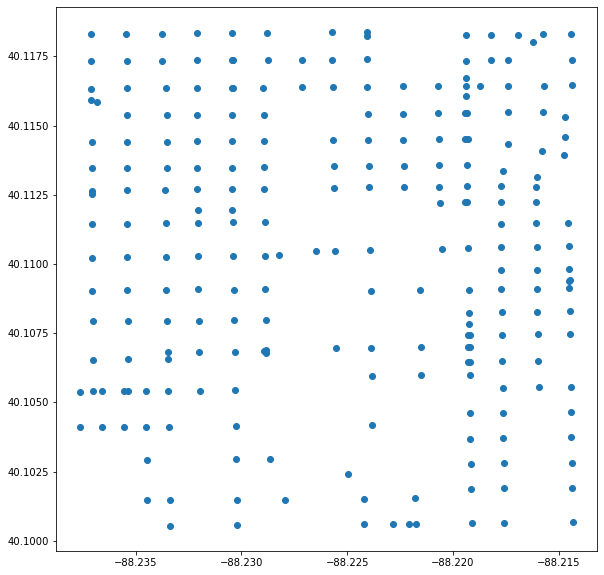

In [12]:
node_gdf.plot()

We can do the same with the edge Geodataframe

In [13]:
edge_gdf.head()

osmid                  name      highway  oneway  \
u        v        key                                                       
37967516 37975527 0    5341884    West Church Street  residential   False   
37968196 38003587 0    5330597  South Orchard Street  residential   False   
37972324 37972330 0    5327435  West Illinois Street     tertiary   False   
         38003587 0    5330593  South Orchard Street  residential   False   
         38003613 0    5330595  South Orchard Street  residential   False   

                        length  \
u        v        key            
37967516 37975527 0    140.138   
37968196 38003587 0      3.494   
37972324 37972330 0    128.515   
         38003587 0     30.254   
         38003613 0     92.960   

                                                                geometry  \
u        v        key                                                      
37967516 37975527 0    LINESTRING (-88.22572 40.11838, -88.22535 40.1...   
37968196 38003587 0    LINESTRING (-88.21448 40.10940, -88.21452 40.1...   
37972324 37972330 0    LINESTRING (-88.21452 40.10913, -88.21461 40.1...   
         38003587 0    LINESTRING (-88.21452 40.10913, -88.21452 40.1...   
         38003613 0    LINESTRING (-88.21452 40.10913, -88.21450 40.1...   

                      maxspeed lanes  ref access bridge  
u        v        key                                    
37967516 37975527 0        NaN   NaN  NaN    NaN    NaN  
37968196 38003587 0        NaN   NaN  NaN    NaN    NaN  
37972324 37972330 0        NaN   NaN  NaN    NaN    NaN  
         38003587 0        NaN   NaN  NaN    NaN    NaN  
         38003613 0        NaN   NaN  NaN    NaN    NaN

<AxesSubplot:>

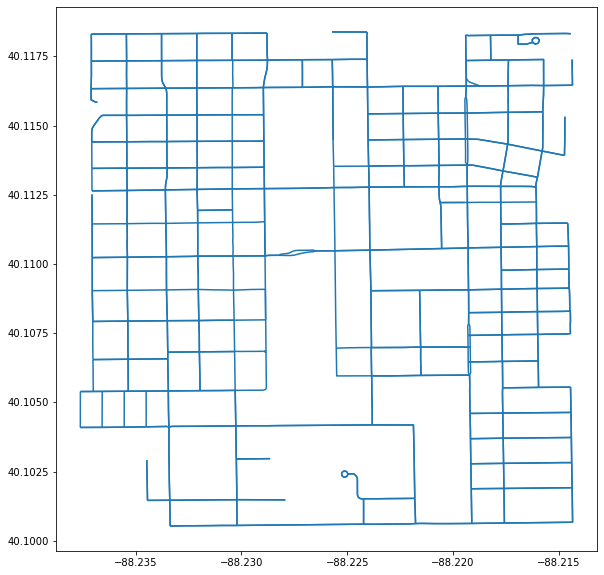

In [14]:
edge_gdf.plot()

**Your turn**

Examine the data for one of the networks above!

<hr id="using-data"/>

# Simple Use Case

Let's calculate the driving time from the Natural History Building to each other node in our network!

First, we will use the `add_edge_speeds` function to try to figure out what the speed limit is on roads which don't have the data, then use the `add_edge_travel_times` function to calculate the travel time in seconds for each edge using the distance and speed limits:

In [15]:
nhb_graph = ox.add_edge_speeds(nhb_graph)

In [16]:
nhb_graph = ox.add_edge_travel_times(nhb_graph)

Let's find the nearest node on our network to the Natural History Building! These coordinates are from Google Maps.

In [17]:
nhb_coords = (40.109442588847976, -88.22625178710955)
nhb_node = ox.nearest_nodes(nhb_graph, X=nhb_coords[1], Y=nhb_coords[0])
print(nhb_node)

5902412844


Let's highlight the node in red. We can make a list of colors to assign to each node and pass those colors to the `plot_graph` function.

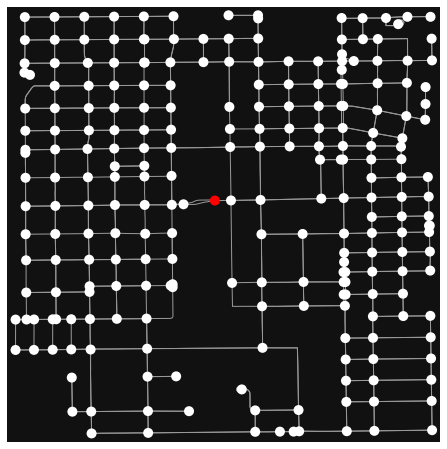

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [18]:
node_colors = ['red' if node == nhb_node else 'white' for node in nhb_graph.nodes()]
ox.plot_graph(nhb_graph, node_size=100, node_color=node_colors)

Now that we know where the Natural History Building is on our graph, let's calculate the driving-time distances for the nodes in our network from the Natural History Building. We will use the networkx function [`single_source_dijkstra_path_length`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra_path_length.html#networkx.algorithms.shortest_paths.weighted.single_source_dijkstra_path_length) to calculate distances from our node. To use the travel times calculated by OSMnx, we will set the `weight` parameter to `travel_time`.

In [19]:
distances = nx.single_source_dijkstra_path_length(nhb_graph,
                                                  nhb_node,
                                                  weight="travel_time")

Let's look at our distances. They are a dictionary mapping node id to travel time:

In [20]:
print(distances)

{5902412844: 0, 1512372840: 6.9, 38065246: 13.7, 1518918162: 18.6, 5727977710: 19.5, 38077757: 29.6, 37974758: 30.1, 1508108536: 30.6, 37985171: 30.900000000000002, 37972349: 33.8, 1905962827: 37.300000000000004, 1514714265: 40.3, 37975504: 41.6, 38015351: 42.0, 8479724206: 42.1, 37974753: 42.400000000000006, 38054106: 42.7, 37985166: 42.800000000000004, 2372811784: 45.3, 1913353501: 46.7, 37975505: 49.0, 37985163: 49.2, 1514714072: 51.099999999999994, 37972343: 51.3, 1514714239: 52.199999999999996, 37974750: 52.400000000000006, 37974769: 52.900000000000006, 38015349: 53.699999999999996, 38054103: 54.0, 1507899557: 54.2, 37985589: 54.7, 38078599: 54.7, 37983598: 54.8, 2366289499: 57.0, 1913353498: 58.2, 38054121: 59.2, 37974751: 59.900000000000006, 37974747: 60.7, 2458643668: 61.7, 38009914: 61.9, 37974771: 62.599999999999994, 38078594: 62.900000000000006, 38148057: 63.599999999999994, 2366289498: 64.9, 38003214: 65.60000000000001, 1905962826: 65.9, 37985588: 65.9, 38098327: 66.0, 3806

With this data, we can add the travel time to our graph:

In [21]:
nx.set_node_attributes(nhb_graph, distances, "time2nhb")

Now let's plot the graph, coloring the nodes by travel time distance from the Natural History Building.

In [22]:
node_colors = ox.plot.get_node_colors_by_attr(nhb_graph, "time2nhb", cmap="RdYlBu")

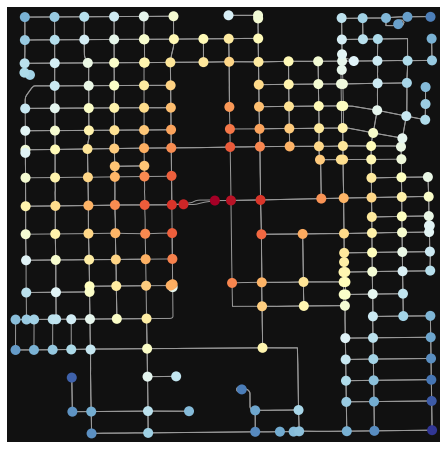

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [23]:
ox.plot_graph(nhb_graph, node_color=node_colors, node_size=100)

**Your turn**

Can you perform this calculation for the graph you've pulled? Maybe calculate travel time from your house?

<hr id="whats-next"/>

# What's Next?

### What else can I do with OSMnx Network Data?

This is just a very brief tour of osmnx specifically for network data. The package can do a lot more. To access the example notebooks from the `osmnx-examples` repository on CyberGISX, you can [click this link](https://cybergisx.cigi.illinois.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fgboeing%2Fosmnx-examples&urlpath=tree%2Fosmnx-examples%2Fnotebooks%2F00-osmnx-features-demo.ipynb&branch=main). When the notebook opens, select the Python 3 kernel.

Here are some notebooks on CyberGISXHub that uses osmnx data:

* [Rapidly Measuring Spatial Accessibility of COVID-19 Healthcare Resources: A Case Study of Illinois, USA.](https://cybergisxhub.cigi.illinois.edu/notebook/rapidly-measuring-spatial-accessibility-of-covid-19-healthcare-resources-a-case-study-of-illinois-usa/)
* [The Context Makes the Difference: Reproducibility and Replicability in Measures of Spatial Accessibility](https://cybergisxhub.cigi.illinois.edu/notebook/the-context-makes-the-difference-reproducibility-and-replicability-in-measures-of-spatial-accessibility/)
* [Stochastic-distribution-of-spatial-accessibility-to-ICU-beds](https://cybergisxhub.cigi.illinois.edu/notebook/stochastic-distribution-of-spatial-accessibility-to-icu-beds/)

...or you can check out the other work being done on CyberGISX: https://cybergisxhub.cigi.illinois.edu/notebooks-discovery

<a id='refs'></a>
## References

* [Dr. Boeing's blog post on OSMnx](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)
* [Dr. Boeing's paper on OSMnx](doi.org/10.1016/j.compenvurbsys.2017.05.004)
* [OSMnx Examples](https://github.com/gboeing/osmnx-examples)
* [OSMnx Github](https://github.com/gboeing/osmnx)

To access the example notebooks from the `osmnx-examples` repository on CyberGISX, you can [click this link](https://cybergisx.cigi.illinois.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fgboeing%2Fosmnx-examples&urlpath=tree%2Fosmnx-examples%2Fnotebooks%2F00-osmnx-features-demo.ipynb&branch=main). When the notebook opens, select the Python 3 kernel.